In [2]:
!pip install tensorflow==2.0.0

      Successfully uninstalled tensorflow-2.5.0


In [3]:
#import data dari drive
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [4]:
data = "/content/drive/MyDrive/rockpaperscissors.zip"

In [5]:
#extract data
import zipfile

with zipfile.ZipFile(data, 'r') as z:
    z.extractall()

In [6]:
import os
import cv2

data_path = "./rockpaperscissors/"
os.listdir(data_path)

['README_rpc-cv-images.txt', 'rps-cv-images', 'rock', 'scissors', 'paper']

In [7]:
trainz = os.path.join(data_path, 'train')
validation = os.path.join(data_path, 'val')
roc = os.path.join(data_path, 'rock')
pap = os.path.join(data_path, 'paper')
sciss = os.path.join(data_path, 'scissors')

In [8]:
##
os.mkdir(trainz)
os.mkdir(validation)

In [9]:
#membuat directory dari masing-masing kategori data
train_roc = os.path.join(trainz, 'rock')
train_pap = os.path.join(trainz, 'paper')
train_sciss = os.path.join(trainz, 'scissors')
val_roc = os.path.join(validation, 'rock')
val_pap = os.path.join(validation, 'paper')
val_sciss = os.path.join(validation, 'scissors')

In [10]:
##
os.mkdir(train_roc)
os.mkdir(train_pap)
os.mkdir(train_sciss)
os.mkdir(val_roc)
os.mkdir(val_pap)
os.mkdir(val_sciss)

In [11]:
from sklearn.model_selection import train_test_split
import shutil

Split Data

In [12]:
#Split data, dengan pembagian 40% data testing dan 60% data training

trainroc_dir, valroc_dir = train_test_split(os.listdir(roc), test_size = 0.40)
trainpap_dir, valpap_dir = train_test_split(os.listdir(pap), test_size = 0.40)
trainsciss_dir, valsciss_dir = train_test_split(os.listdir(sciss), test_size = 0.40)

In [13]:
for file in trainroc_dir:
  shutil.copy(os.path.join(roc, file), os.path.join(train_roc, file))
for file in trainpap_dir:
  shutil.copy(os.path.join(pap,file), os.path.join(train_pap,file))
for file in trainsciss_dir:
  shutil.copy(os.path.join(sciss,file), os.path.join(train_sciss,file))
for file in valroc_dir:
  shutil.copy(os.path.join(roc, file), os.path.join(val_roc,file))
for file in valpap_dir:
  shutil.copy(os.path.join(pap,file), os.path.join(val_pap,file))
for file in valsciss_dir:
  shutil.copy(os.path.join(sciss,file), os.path.join(val_sciss,file))

Augmentasi

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    shear_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    shear_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [16]:
train_generator = train_datagen.flow_from_directory(
    trainz,
    target_size=(150,150),
    batch_size= 32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [17]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding="same", activation=tf.nn.relu, input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.summary()
model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch = 41, # 1312 images = batch_size * steps
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 27, # 876 images = batch_size * steps
    verbose =2
)

Train for 41 steps, validate for 27 steps
Epoch 1/10
41/41 - 49s - loss: 0.8799 - accuracy: 0.5633 - val_loss: 0.5550 - val_accuracy: 0.7789
Epoch 2/10
41/41 - 47s - loss: 0.3047 - accuracy: 0.8887 - val_loss: 0.1520 - val_accuracy: 0.9502
Epoch 3/10
41/41 - 47s - loss: 0.2215 - accuracy: 0.9261 - val_loss: 0.1534 - val_accuracy: 0.9433
Epoch 4/10
41/41 - 47s - loss: 0.1417 - accuracy: 0.9581 - val_loss: 0.1760 - val_accuracy: 0.9456
Epoch 5/10
41/41 - 47s - loss: 0.1326 - accuracy: 0.9550 - val_loss: 0.1366 - val_accuracy: 0.9387
Epoch 6/10
41/41 - 48s - loss: 0.1182 - accuracy: 0.9520 - val_loss: 0.1640 - val_accuracy: 0.9444
Epoch 7/10
41/41 - 47s - loss: 0.0919 - accuracy: 0.9710 - val_loss: 0.0566 - val_accuracy: 0.9861
Epoch 8/10
41/41 - 47s - loss: 0.0859 - accuracy: 0.9756 - val_loss: 0.0610 - val_accuracy: 0.9745
Epoch 9/10
41/41 - 47s - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.1568 - val_accuracy: 0.9479
Epoch 10/10
41/41 - 47s - loss: 0.0692 - accuracy: 0.9748 - val_los

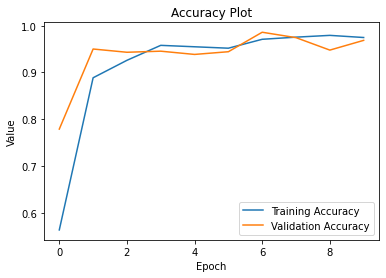

In [20]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()

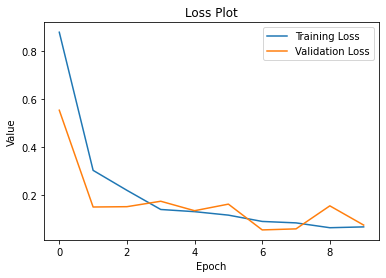

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()


Saving 1oKnUgV2CdCaQUUX.png to 1oKnUgV2CdCaQUUX.png
1oKnUgV2CdCaQUUX.png
paper


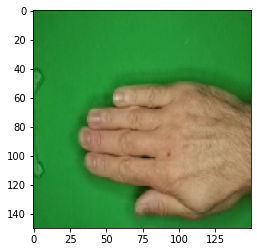

In [22]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')